### Zimbabwe School Examination Council 2022 Grade 7 Results Analysis

### This Analysis is based on the published document by ZIMSEC with the following information. 
- **Centre Number** - A centre number is a unique identifier for all schools which are registered to administer 
  examinations in Zimbabwe
- **Centre Name**- Is the name of the school where examinations are written 
- **District** - Districts in this case are based on ZIMSEC Delimitation 
- **Candidates**- Number of candidates per center who wrote the examination
- **Pass**- is the total naumber of pupils passed the examination
- **Pass_rate**- is the percentage of pipuls who passed the examination at a given center
- **Rank**- How the school is ranked based on the results of that year

In [1]:
#import important packages for analysis
import pandas as pd # data wrangling and analysis
import numpy as np
import matplotlib.pyplot as plt #Visualizatio
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
#Import dataset 
df=pd.read_excel("grade7.xlsx")
df.head()

,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
0,15100,ASPINDALE PARK,Glenview Mufakose,38,38,1.0,1
1,15785,DIVARIS MAKAHARIS JUNIOR,Warren Park Mabelreign,16,16,1.0,2
2,15800,DOMINICAN CONVENT,Mbare Hatfield,69,69,1.0,3
3,16130,HAPPY PRIMARY,Northern Central,9,9,1.0,4
4,17120,LUSITANIA,Mabvuku Tafara,51,51,1.0,5


In [3]:
df.tail(10)

,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
5255,95970,GWATEMBA,Insiza,10,0,0.0,5256
5256,96330,LUBHANGWE PRIMARY,Matobo,14,0,0.0,5257
5257,97200,MBEMBESI,Insiza,10,0,0.0,5258
5258,97260,MBOMA,Bulilima,19,0,0.0,5259
5259,97730,NDUTSHWA,Bulilima,12,0,0.0,5260
5260,98170,PHUMUZA,Bulilima,13,0,0.0,5261
5261,98230,RIVER BLOCK,Gwanda,7,0,0.0,5262
5262,98860,ST THERESA,Insiza,11,0,0.0,5263
5263,98975,KOODOOVALE,Gwanda,12,0,0.0,5264
5264,99380,ZINDELE,Gwanda,14,0,0.0,5265


#### The function *tail()* above prints out bottom 10 primary schools ie 10 least ranked schools. 
#### From the results presented, all schools in bottom 10 are from **Matebeleland**

In [4]:
dfl=len(df)
print(f'{dfl} is the total number of primary schools with centre number numbers in Zimbabwe')

5265 is the total number of primary schools with centre number numbers in Zimbabwe


In [5]:
df.describe()

,Centre_number,candidates,Pass,Pass_rate,Rank
count,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000
mean,58729.981766,60.934093,28.566382,0.391896,2633.000000
std,24750.031851,53.306132,40.892064,0.247327,1520.018914
min,15020.000000,1.000000,0.000000,0.000000,1.000000
25%,36395.000000,29.000000,7.000000,0.200000,1317.000000
50%,57335.000000,43.000000,15.000000,0.346900,2633.000000
75%,77640.000000,73.000000,30.000000,0.542600,3949.000000
max,109996.000000,639.000000,318.000000,1.000000,5265.000000


In [6]:
dfmax=df.candidates.max()
print("Results below let us see the school with maximum/minimum number of candidats")
print('________________________________________________________________________')
print(f'Based on ZIMSEC results, there is a school with: {dfmax} candidates')
print('________________________________________________________________________')
dfmin=df.candidates.min()
print(f'Based on ZIMSEC results, there is a school with: {dfmin}  candidate')

Results below let us see the school with maximum/minimum number of candidats
________________________________________________________________________
Based on ZIMSEC results, there is a school with: 639 candidates
________________________________________________________________________
Based on ZIMSEC results, there is a school with: 1  candidate


In [7]:
#To check whether there are missing values in the dataset 
df.isnull().sum()

Centre_number    0
center_name      0
District         0
candidates       0
Pass             0
Pass_rate        0
Rank             0
dtype: int64

#### There are no missing values from the dataset

In [8]:
##Lets see the name of schools with least number of candidates
print(df[df.candidates==df.candidates.min()])

      Centre_number center_name  District  candidates  Pass  Pass_rate  Rank
5221          65630  CHISAMBIJI  Chiredzi           1     0        0.0  5222


#### A primary school in **CHIREDZI** Called **Chisumbanji** had only 1 candidate who wrote the examination and failed 

In [9]:
#Lets see the name of a school with maximam number of candidates
print(df[df.candidates==df.candidates.max()])

      Centre_number  center_name   District  candidates  Pass  Pass_rate  Rank
1678          15220  BLACKFORDBY  High Glen         639   305     0.4773  1679


#### A primary school in Harare **Highglen** District called **BLACKFORDBY** had 639 candidates who set for exams in 2022 and only 305 out of 639 passed   

In [10]:
#Lets see all schools per district with highest number of candidates 
candidates=df.groupby("candidates").District.value_counts().sort_index(ascending=False).to_frame()
candidates.head(20)

,,District
candidates,District,
639,High Glen,1
564,Northern Central,1
448,Chitungwiza,1
446,Mabvuku Tafara,1
434,Mabvuku Tafara,1
403,Reigate,1
399,High Glen,1
381,Seke,1
378,Chitungwiza,1


#### Above is the top 20 primary schools interms of candidates per centre. Harare metro-province dominating the list. 

In [11]:
#Lets see schools with least number of candidates who sat for the exam 
candidates=df.groupby("candidates").District.value_counts().sort_index(ascending=True).to_frame()
candidates.head(20)

District
candidates District             
1          Chiredzi            1
3          Chegutu             1
4          Chiredzi            1
           Gweru               1
           Sanyati             1
           Zvimba              1
5          Chegutu             1
           Chikomba            2
           Chipinge            1
           Gokwe North         1
           Lupane              1
           Masvingo            1
           Mt. Darwin          1
           Zvimba              1
6          Chegutu             1
           Chikomba            1
           Chiredzi            1
           Chirumanzu          1
           Gutu                3
           Kwekwe              1

#### There are a couple of schools in many district with less than 10 candidates who wrote the examnation in 2022


In [12]:
#let us have a list of schools who attained 100% passrate
pass100=(df[df.Pass_rate==df.Pass_rate.max()])
pass100

,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
0,15100,ASPINDALE PARK,Glenview Mufakose,38,38,1.0,1
1,15785,DIVARIS MAKAHARIS JUNIOR,Warren Park Mabelreign,16,16,1.0,2
2,15800,DOMINICAN CONVENT,Mbare Hatfield,69,69,1.0,3
3,16130,HAPPY PRIMARY,Northern Central,9,9,1.0,4
4,17120,LUSITANIA,Mabvuku Tafara,51,51,1.0,5
5,17250,MARANATHA,Warren Park Mabelreign,61,61,1.0,6
6,17390,MOTHER PATRICK CONVENT,Mbare Hatfield,53,53,1.0,7
7,17590,PATHWAY PRIVATE,Chitungwiza,60,60,1.0,8
8,18160,ST. MARTINS CONVENT,Mbare Hatfield,35,35,1.0,9
9,18470,THE GRANGE CHRISTIAN SCHO,Northern Central,50,50,1.0,10


#### There are 45 primary schools who attained 100% passrate in Zimbabwe 

In [13]:
#lets have a list of primary schools who got 0% in 2022 results 
pass00=(df[df.Pass_rate==df.Pass_rate.min()])
passlen=len(pass00)
print(f'There are {passlen} schools with 0% passrate accross Zimbabwe: The list is as follows')
pass00

There are 88 schools with 0% passrate accross Zimbabwe: The list is as follows


,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
5177,26300,KAGORE,Nyanga,14,0,0.0,5178
5178,26615,MAKANDWA,Chimanimani,13,0,0.0,5179
5179,27515,MUTSIYABAKO,Mutare,26,0,0.0,5180
5180,27780,NGWENA,Makoni,14,0,0.0,5181
5181,27920,NYAMHINGURA ST JAMES,Mutasa,7,0,0.0,5182
...,...,...,...,...,...,...,...
5260,98170,PHUMUZA,Bulilima,13,0,0.0,5261
5261,98230,RIVER BLOCK,Gwanda,7,0,0.0,5262
5262,98860,ST THERESA,Insiza,11,0,0.0,5263
5263,98975,KOODOOVALE,Gwanda,12,0,0.0,5264


In [14]:
# Now let us have a list of schools per passrate.
df1=df.Pass_rate.value_counts().rename_axis("Passrate").to_frame("Number of schools")
df1.head(30)

,Number of schools
Passrate,
0.0000,88
0.5000,79
0.3333,73
0.2500,70
0.2000,58
0.1667,47
1.0000,45
0.1250,44
0.4000,42


#### 88 Primary schools had 0% passrate, 79 had 50% passrate. 

In [15]:
pas0=df[(df['Pass_rate']==0.0) & (df['Pass']==0)]
pas0

,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
5177,26300,KAGORE,Nyanga,14,0,0.0,5178
5178,26615,MAKANDWA,Chimanimani,13,0,0.0,5179
5179,27515,MUTSIYABAKO,Mutare,26,0,0.0,5180
5180,27780,NGWENA,Makoni,14,0,0.0,5181
5181,27920,NYAMHINGURA ST JAMES,Mutasa,7,0,0.0,5182
...,...,...,...,...,...,...,...
5260,98170,PHUMUZA,Bulilima,13,0,0.0,5261
5261,98230,RIVER BLOCK,Gwanda,7,0,0.0,5262
5262,98860,ST THERESA,Insiza,11,0,0.0,5263
5263,98975,KOODOOVALE,Gwanda,12,0,0.0,5264


<Figure size 1440x720 with 0 Axes>

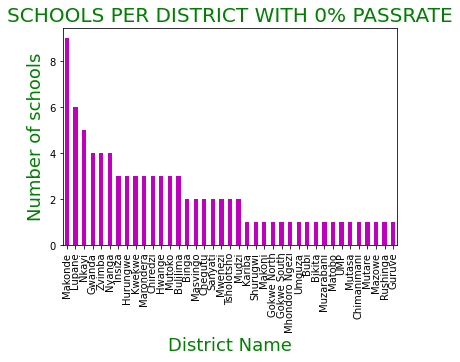

<Figure size 1440x720 with 0 Axes>

In [16]:
#Lets visualize number of schools per district with zero% passrate
pas0.District.value_counts().plot(kind='bar', color='m', grid=False)
plt.xlabel("District Name", color='g', fontsize=18)
plt.ylabel('Number of schools', color='g',fontsize=18)
plt.title('SCHOOLS PER DISTRICT WITH 0% PASSRATE', fontsize=20, color='g')
plt.figure(figsize=(20,10))

#### Makonde District have the highest Number of schools with 0% pass rate. 
Most of the districts had only 1 school with 0% passrate
Lupane had 6, Nkayi 5 schools Nyanga (4), Zvimba (4) and Gwanda(4)


In [17]:
#Lets have schools with 100% Passrate
pas100=df[(df['Pass_rate']==1.0)]
pas100

,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
0,15100,ASPINDALE PARK,Glenview Mufakose,38,38,1.0,1
1,15785,DIVARIS MAKAHARIS JUNIOR,Warren Park Mabelreign,16,16,1.0,2
2,15800,DOMINICAN CONVENT,Mbare Hatfield,69,69,1.0,3
3,16130,HAPPY PRIMARY,Northern Central,9,9,1.0,4
4,17120,LUSITANIA,Mabvuku Tafara,51,51,1.0,5
5,17250,MARANATHA,Warren Park Mabelreign,61,61,1.0,6
6,17390,MOTHER PATRICK CONVENT,Mbare Hatfield,53,53,1.0,7
7,17590,PATHWAY PRIVATE,Chitungwiza,60,60,1.0,8
8,18160,ST. MARTINS CONVENT,Mbare Hatfield,35,35,1.0,9
9,18470,THE GRANGE CHRISTIAN SCHO,Northern Central,50,50,1.0,10


<Figure size 1440x720 with 0 Axes>

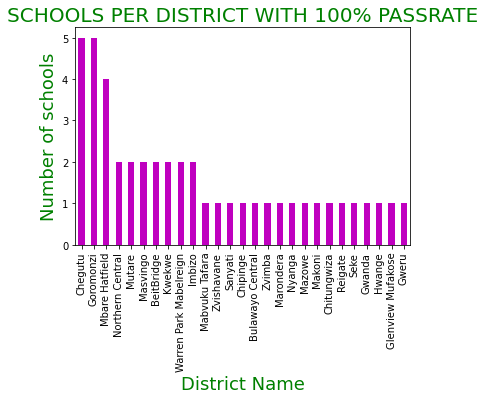

<Figure size 1440x720 with 0 Axes>

In [18]:
#Lets visualize number of schools per districts with 100% passrate
pas100.District.value_counts().plot(kind='bar', color='m', grid=False)
plt.xlabel("District Name", color='g', fontsize=18)
plt.ylabel('Number of schools', color='g',fontsize=18)
plt.title('SCHOOLS PER DISTRICT WITH 100% PASSRATE', fontsize=20, color='g')
plt.figure(figsize=(20,10))

#### Goromonzi and Chegutu Districts all have 5 schools with 100% passrate Whilst Mbare Hatfield is the third with 4 schools with 100% passrate

In [19]:
#List of schools with 95% and above passrate 
pass95=df[(df['Pass_rate']>=0.95)]
pass95

,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
0,15100,ASPINDALE PARK,Glenview Mufakose,38,38,1.0000,1
1,15785,DIVARIS MAKAHARIS JUNIOR,Warren Park Mabelreign,16,16,1.0000,2
2,15800,DOMINICAN CONVENT,Mbare Hatfield,69,69,1.0000,3
3,16130,HAPPY PRIMARY,Northern Central,9,9,1.0000,4
4,17120,LUSITANIA,Mabvuku Tafara,51,51,1.0000,5
...,...,...,...,...,...,...,...
130,66835,MASHAPA S D A,Masvingo,41,39,0.9512,131
131,17900,SELBORNE ROUTLEDGE,Warren Park Mabelreign,142,135,0.9507,132
132,16720,HIGHLANDS,Northern Central,180,171,0.9500,133
133,28495,ST JOSEPH (MUTARE),Mutare,200,190,0.9500,134


<Figure size 1440x5760 with 0 Axes>

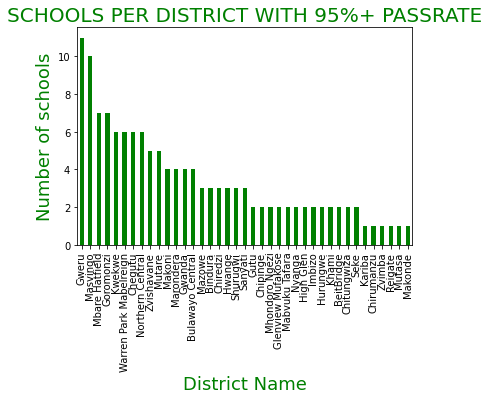

<Figure size 1440x5760 with 0 Axes>

In [20]:
# schools per district with 95% 
pass95.District.value_counts().plot(kind='bar', color='g', grid=False)
plt.xlabel("District Name", color='g', fontsize=18)
plt.ylabel('Number of schools', color='g',fontsize=18)
plt.title('SCHOOLS PER DISTRICT WITH 95%+ PASSRATE', fontsize=20, color='g')
plt.figure(figsize=(20,80))

#### From the graph above, Gweru district have 15 schools who attained 95% and above passrate. masvingo have 10 Mbare hatfiield and Goromonzi both have 7 Schools with 95% and above passrate

In [21]:
df_under50=df[(df["Pass_rate"]<0.5)]
print(f'There are {len(df_under50)} schools out of {len(df)} Primary schools with less than 50% passrate, Below is the list')
df_under50

There are 3684 schools out of 5265 Primary schools with less than 50% passrate, Below is the list


,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
1581,36910,MUTAKE,Goromonzi,139,69,0.4964,1582
1582,45850,EMHLANGENI,Bubi,107,53,0.4953,1583
1583,17200,MAKOMO,Mabvuku Tafara,326,161,0.4939,1584
1584,56938,MSASA (RUCHANYU),Shurugwi,75,37,0.4933,1585
1585,27720,NESHAVA PRIMARY,Buhera,69,34,0.4928,1586
...,...,...,...,...,...,...,...
5260,98170,PHUMUZA,Bulilima,13,0,0.0000,5261
5261,98230,RIVER BLOCK,Gwanda,7,0,0.0000,5262
5262,98860,ST THERESA,Insiza,11,0,0.0000,5263
5263,98975,KOODOOVALE,Gwanda,12,0,0.0000,5264


Text(0.5, 0, 'District')

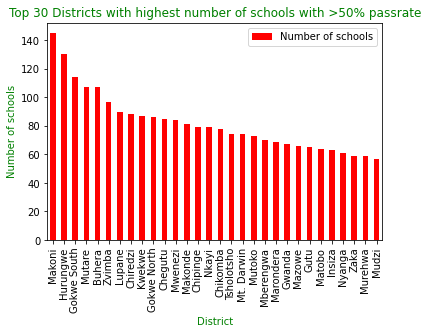

In [22]:
#Top 20 district with highest number schools with less than 50% pass rate
df_1=df_under50.District.value_counts().rename_axis("District").to_frame("Number of schools")
df_1.head(30).plot(kind="bar", color="r")
plt.title("Top 30 Districts with highest number of schools with >50% passrate", color ='g')
plt.ylabel("Number of schools", color="g")
plt.xlabel("District", color="g")

#### **Makoni** district with the highest number of schools with lest that 50% passrate followed by **Hurungwe**

<Figure size 1440x5760 with 0 Axes>

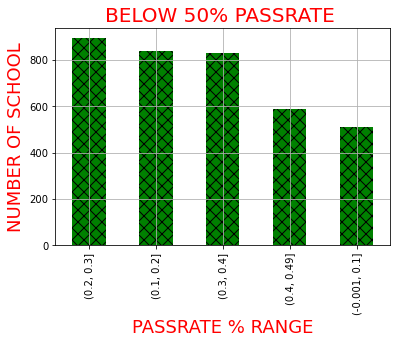

<Figure size 1440x5760 with 0 Axes>

In [23]:
#lets did deep and see the passrate percentage range with highest number of schools
df_under50.Pass_rate.value_counts(bins=[0.0,0.1, 0.2,0.3,0.4,0.49]).plot(kind='bar', 
                                                                         color='g', grid=True, hatch='xx')
plt.xlabel("PASSRATE % RANGE", color='r', fontsize=18)
plt.ylabel('NUMBER OF SCHOOL', color='r',fontsize=18)
plt.title('BELOW 50% PASSRATE ', color='r', fontsize=20)
plt.figure(figsize=(20,80))

#### 800+ failed to attain 20% to 30% passrate, 500+ schools also failed to get 0 to 10% passrate

In [24]:
# List of schools with 50% and above passrate
df_50_above=df[(df["Pass_rate"]>=0.5)]
print(f'There are {len(df_50_above)} primary schools out of {len(df)} total schools with 50% and above passrate, Below is the list:')
df_50_above

There are 1581 primary schools out of 5265 total schools with 50% and above passrate, Below is the list:


,Centre_number,center_name,District,candidates,Pass,Pass_rate,Rank
0,15100,ASPINDALE PARK,Glenview Mufakose,38,38,1.0,1
1,15785,DIVARIS MAKAHARIS JUNIOR,Warren Park Mabelreign,16,16,1.0,2
2,15800,DOMINICAN CONVENT,Mbare Hatfield,69,69,1.0,3
3,16130,HAPPY PRIMARY,Northern Central,9,9,1.0,4
4,17120,LUSITANIA,Mabvuku Tafara,51,51,1.0,5
...,...,...,...,...,...,...,...
1576,97990,NULI,BeitBridge,34,17,0.5,1577
1577,98700,SITEZI,Gwanda,30,15,0.5,1578
1578,98850,ST SEBASTIAN,Matobo,42,21,0.5,1579
1579,98960,THOKOZANI,Insiza,30,15,0.5,1580


Text(0.5, 0, 'District')

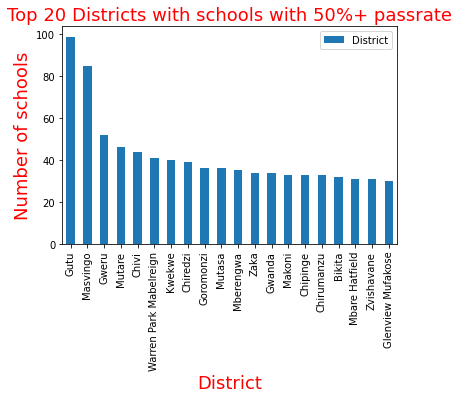

In [25]:
df_2=df_50_above.District.value_counts().to_frame()
df_2.head(20).plot(kind='bar')
plt.title("Top 20 Districts with schools with 50%+ passrate",fontsize=18, color ='r')
plt.ylabel("Number of schools", color="r", fontsize=18)
plt.xlabel("District", color="r", fontsize=18)

Text(0.5, 0, 'District')

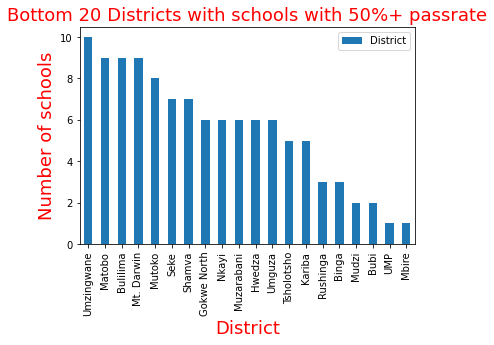

In [26]:
df_2.tail(20).plot(kind='bar')
plt.title("Bottom 20 Districts with schools with 50%+ passrate",fontsize=18, color ='r')
plt.ylabel("Number of schools", color="r", fontsize=18)
plt.xlabel("District", color="r", fontsize=18)

Text(0.5, 0, 'District')

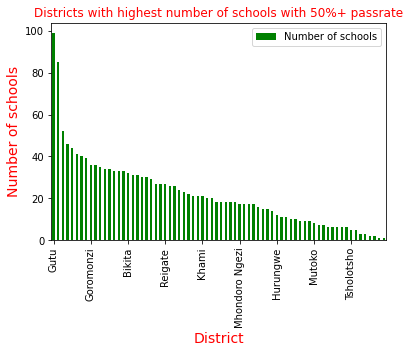

In [30]:
df_2=df_50_above.District.value_counts().rename_axis("District").to_frame("Number of schools")
df_2.plot(kind="bar", color="g")
plt.title("Districts with highest number of schools with 50%+ passrate", color ='r')
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.ylabel("Number of schools", color="r", fontsize=14)
plt.xlabel("District", color="r", fontsize=14)

#### Gutu Disrict have 99 schools with 50%+ passrate, Whilst Umzingwane have 10 Uzumba Maramapfungwe and Mbire District both have 1. 

<Figure size 1440x5760 with 0 Axes>

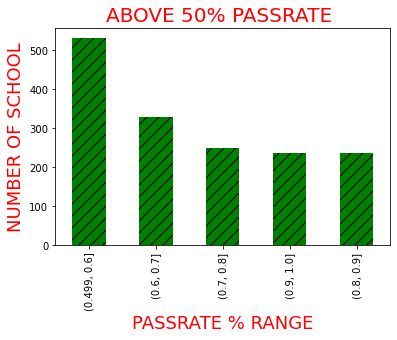

<Figure size 1440x5760 with 0 Axes>

In [28]:
df_50_above.Pass_rate.value_counts(bins=[0.5,0.6, 0.7,0.8,0.9,1.0]).plot(kind='bar', 
                                                                         color='g', grid=False, hatch='//')
plt.xlabel("PASSRATE % RANGE", color='r', fontsize=18)
plt.ylabel('NUMBER OF SCHOOL', color='r',fontsize=18)
plt.title('ABOVE 50% PASSRATE ', color='r', fontsize=20)
plt.figure(figsize=(20,80))

### 600 schools' passrate ranges between 50 to 60%, 240+ school accross Zimbabwe have 90 to 100% percentage passrate

The percentage passrate is 0.3002849002849003 


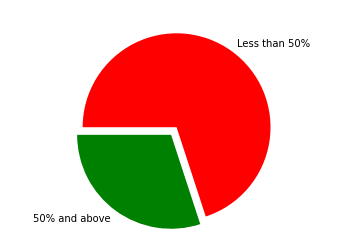

In [29]:
x=len(df_50_above)/len(df)
y=len(df_under50)/len(df)
labels=["50% and above","Less than 50%"]
values=[x,y]
colors=['green','red']
explode= [0,0.1]
plt.title('Zimbabwe Grade 7 Pass_rite ', color='w')
plt.pie(values,labels=labels, colors=colors, explode=explode, startangle=180)
plt.axis('equal')
print(f"The percentage passrate is {x} ")

## **----------------->>END<<----------------------------**